### Deep Neural Network with L2 / L1 Regularization using Keras

In [29]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import Input

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [32]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28 * 28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32') / 255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28 * 28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32') / 255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

#### DNN Model

In [33]:
dnnModel = models.Sequential()

In [34]:
# Layer 1 = input layer
# specify the input size for in the first layer.

dnnModel.add(Input(shape=(28*28,)))  # Proper input declaration
dnnModel.add(layers.Dense(50, activation='relu'))
dnnModel.add(layers.Dense(60, activation='relu',
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)))
dnnModel.add(layers.Dense(30, activation='relu'))
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

#### Regularization and Optimizations of DNN

In [35]:
dnnModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
h = dnnModel.fit( Xtrain, Ytrain, epochs=25, validation_split=0.2, batch_size=64)

Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2797 - loss: 2.2553 - val_accuracy: 0.8033 - val_loss: 0.7588
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8916 - loss: 0.5686 - val_accuracy: 0.9400 - val_loss: 0.3190
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9431 - loss: 0.3045 - val_accuracy: 0.9474 - val_loss: 0.2565
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9539 - loss: 0.2393 - val_accuracy: 0.9495 - val_loss: 0.2353
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9596 - loss: 0.2041 - val_accuracy: 0.9523 - val_loss: 0.2208
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9642 - loss: 0.1824 - val_accuracy: 0.9525 - val_loss: 0.2149
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9684 - loss: 0.1651 - val_accuracy: 0.9513 - val_loss: 0.2135
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9697 - loss: 0.1534 - val_accuracy: 0

In [37]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 0.09287509322166443
Final training accuracy  0.9818333387374878


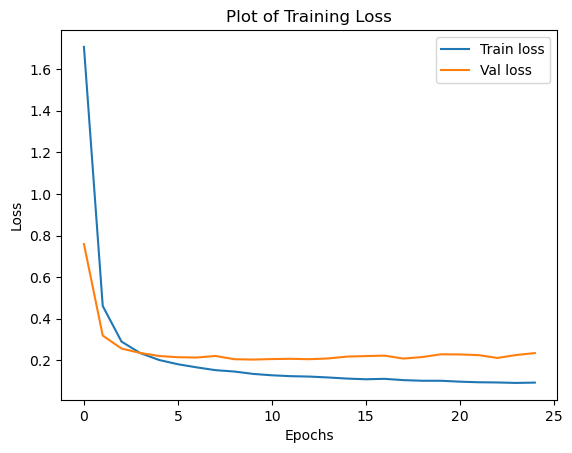

In [38]:
# plot the training loss

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

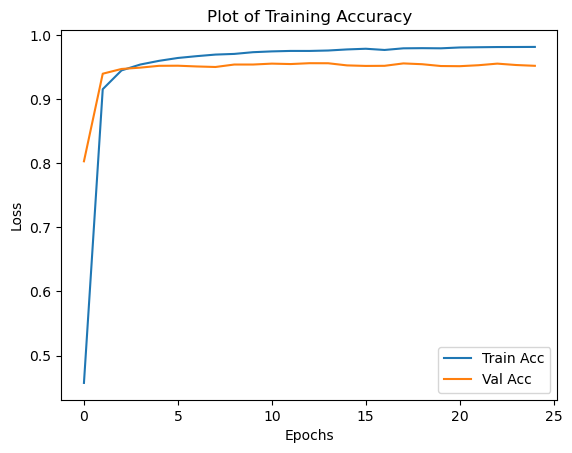

In [39]:
# plot the training accuracy

plt.plot(h.history['accuracy'], label='Train Acc')
plt.plot(h.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

In [40]:
test_loss, test_accuracy = dnnModel.evaluate(Xtest, Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9475 - loss: 0.2342


In [41]:
print('Testing loss \t', test_loss)
print('Testing accuracy ', test_accuracy)

Testing loss 	 0.21443913877010345
Testing accuracy  0.95169997215271
